# Tarea 1 Inteligencia Artificial. Andrés Jiménez, Moisés Salguero.


## 1. Demostración de que la clasificación se puede dar haciendo uso de únicamente un percetrón aislado.

Por definición, el espacio de entradas de un perceptrón aislado debe ser de únicamente 2 categorías, de forma que al tener un problema de clasificación con 4 categorías se vuelve imposible para un perceptrón aislado. Además, el resultado de un perceptrón aislado viene siendo una variedad lineal del espacio de entradas, cuya función es separar 2 categorías, esto se muestra en la siguiente figura.

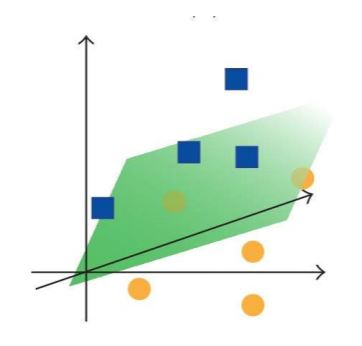

## 2. Demostración de que una red de perceptrones de una capa de entrada y una capa de salida conectadas exhaustivamente no pueden realizar la clasificación.

Para realizar esta demostración se va a programar una red de percetrones con únicamente una capa de entrada y una capa de salida. El número de neuronas es fijo ya que tanto las entradas como las salidas deben de coincidir con el número de categorías, para este caso 4. Se utilzó como función de activación en la entrada una tangente hiperbólica y para la salida, se utilizó la función de densidad de probabilidad "softmax". Además, como función de pérdidas se utilizó ADAM (descenso de gradiente con estimación adaptativa de momentum).

In [1]:
#Se realiza la importación de la librería necesarias para generar un MPL básico
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_4.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]

# asegurarse que los datos sean flotantes
X = X.astype('float32')

# convertir los strings a enteros 
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación tanh y como entradas la cantidad de columnas de X_train
model.add(Dense(0, activation='tanh', kernel_initializer='he_normal', input_shape=(n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation='softmax'))

# compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Precisión: %.3f' % acc)
# realiza una predicción, esta corresponde a la categoría 3
row = [1.680,0.453,2.327,0.436]
yhat = model.predict([row])
print('Nueva predicción: %s (Categoría=%d)' % (yhat, argmax(yhat)))

Como se puede apreciar de los resultados, todas las salidas presentaron la misma probabilidad y la precisión fue menos de un 50%. No hay forma de mejorar estos resultados ya que ambas capas tiene un número fijo de neuronas; en este caso 4, ya que son 4 categorías a la salida y 4 sensores a la entrada. De esta forma queda demostrado para cualesquiera puntos del conjunto, que este tipo de red no puede clasificar de manera adecuada.

## 3. Estudio de clasificación de datos y variación de hiperparámetros

Para el caso del punto 3, se variaron algunos parametros con tal de analizar los resultados, tales como número de neuronas, tasa de aprendizaje, uso de término de momento o ausencia del mismo, número de iteraciones y mecanismos de optimización. A continuación se define una red neuronal con una sola capa oculta con 10 neuronas, con un modelo secuencial.

In [4]:
import tensorflow as tf
import random
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise

path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_4.csv"
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]

# asegurarse que los datos sean flotantes
X = X.astype('float32')

# convertir los strings a enteros 
y = LabelEncoder().fit_transform(y)


# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo 
model = Sequential() # definir el tipo de modelo, en este caso secuencial
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal')) #capa oculta
model.add(Dense(4, activation='softmax')) # capa final 

### Función de optimización Adam

#### 100 iteraciones
Para las siguientes pruebas se usará la función de optimización Adam, la cual no usa el 'momentum'.
En este caso específico se usó una taza de aprendizaje de 0.001,  100 iteraciones y 10 neuronas

In [5]:
# función  de optimización adam y sus parámetros, entre ellos la tasa de aprendizaje
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam' )

# compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc) # imprime la precisión
print ('Test loss: %.3f' %loss)    # imprime la pérdida

Test Accuracy: 0.976
Test loss: 0.098


Cambiandole la tasa de aprendizaje de 0.001 a 0.1 se obtiene el siguiente resultado y 100 iteraciones:

In [6]:
# función adam 
tf.keras.optimizers.Adam(
    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
# compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.983
Test loss: 0.065


Y si finalmente se pone una taza de 3, se obtiene:

In [7]:
# función Adam
tf.keras.optimizers.Adam(
    learning_rate=3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)
# compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.973
Test loss: 0.065


#### 1000 iteraciones
Ahora se harán los mismos procedimientos anteriores pero esta vez con 1000 iteraciones, primero se realiza la prueba con una taza de aprendizaje de 0.001:

In [8]:
# función  de optimización adam y sus parámetros
tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam' )

# compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

: 0.993
Test loss: 0.039


Luego, se cambia la taza de aprendizaje a 0.1:

In [23]:
# función  de optimización adam y sus parámetros
tf.keras.optimizers.Adam(
    learning_rate=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam' )

# compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.991
Test loss: 0.029


Y finalmente se cambia la taza a 3:

In [9]:
# función  de optimización adam y sus parámetros
tf.keras.optimizers.Adam(
    learning_rate=0.3, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam' )

# compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.991
Test loss: 0.037


### Función  de optimización SGD 
#### 100 iteraciones
Si en cambio se usa una función de optimización con momentum, como lo es la función de gradiente descendiente, con los siguientes parámetros como primer prueba: Momentum en 0, tasa de aprendizaje 0.01 y 100 iteraciones

In [10]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.984
Test loss: 0.053


Además, si se pone una taza de aprendizaje de 0.1

In [11]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=0.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.985
Test loss: 0.050


Y finalmente se pone una taza de aprendizaje de 3:

In [12]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=3, momentum=0.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.901
Test loss: 0.573


Luego, si se cambia el momentum por 1, y se repiten los parámetros: taza de aprendizaje de 0.01

In [13]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.972
Test loss: 0.096


Con una taza de aprendizaje de 0.1:

In [14]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.984
Test loss: 0.082


Y finalmente con una taza de aprendizaje de 3:

In [15]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=3.0, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.987
Test loss: 0.049


#### 1000 iteraciones SGD
Y si se usan 1000 iteraciones en vez de 100, con momentum 1 y taza de aprendizaje de 0.01

In [16]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.981
Test loss: 0.084


Ahora con una taza de aprendizaje de 0.1

In [17]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.992
Test loss: 0.034


Y finalmente con una taza de aprendizaje de 3:

In [18]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=3, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.995
Test loss: 0.029


## 4. Selección del método más adecuado

Como se puede observar en las diferentes pruebas, la más adecuada es la que tiene una función de optimización SGD, con un momentum de 1, una taza de aprendizaje de 0.1, 10 neuronas en capa oculta y 1000 iteraciones. En general, se puede decir que la elección de cantidad de neuronas es un tema de prueba y error. Sin embargo, en la tasa de aprendizaje, se pudo observar que la precisión mejoró cuando se aumentó de 0.001 a 0.1 la taza de aprendizaje, lo cual significa que probalemtente la taza estaba muy pequeña por lo que los saltos para encontrar el mínimo global era muy pequeños. Luego de eso, la cantidad de iteraciones no añadió mejoría aunque esta variable aumentara. Y finalmente, hubo una mejoría al añadir el término momentum con la función de gradiente descendiente (SGD). Como se puede observar con estos parámetros la red tiene una precisión del 99,2% y una pérdida de datos del 3.4% lo cual es un muy buen indicador para la red. 

## 5. Método para analizar el resultado del clasificador

Para evaluar el resultado del clasificador se utilizaron 2 valores importantes: la precisión del test y las pérdidas. Analizando cuantitativamente dichos resultados se logró determinar de manera objetiva el desempeño del clasificador ante variaciones de los hiperparámetros. 

## 6. Fronteras lineales de separación 

Para generar una gráfica que muestre las fronteras de separación lineales, se utilizó un conjunto de datos de 2 sensores virtuales. Dicho conjunto equivale a los 24 sensores iniciales y se aplicó con el fin de hacer una representación en 2 dimensiones. Para probar combinaciones de 3 parámetros, se variará el número de neuronas en la capa oculta, el learning rate y el número de iteraciones. Además, se utilizará  de forma constante el optimizador SGD y la función de activación relu. Inicialmente se variarán las iteraciones, dejando constante un learning rate de 0.1 y 10 neuronas de capa oculta. Con 100 iteraciones se obtiene:

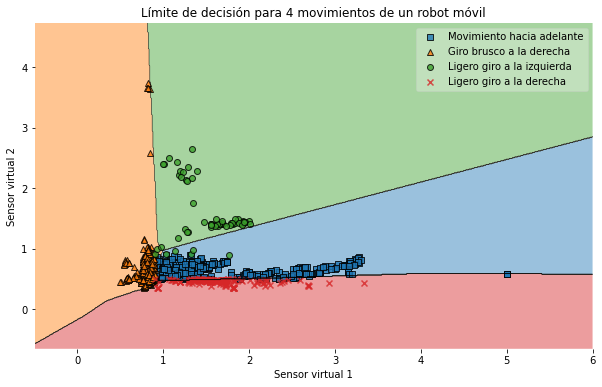

In [21]:
#Importaciones necesarias para gráficar los límites de decisión y generar una red neuronal
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Se define una clase para convertir valores codificados mediante one-hot a valores enteros
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_2.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación tanh y como entradas la cantidad de columnas de X_train
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation='softmax'))

# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(learning_rate=0.1, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

#Convierte las salidas tipo one-hot a números enteros
model_no_ohe = Onehot2Int(model)

#Para determinar los límites de decisión según el modelos del clasificador
ax=plot_decision_regions(X_test, y_test, clf=model_no_ohe)

# Añadir anotaciones a los ejes
plt.xlabel('Sensor virtual 1')
plt.ylabel('Sensor virtual 2')
plt.title('Límite de decisión para 4 movimientos de un robot móvil')
plt.rcParams["figure.figsize"] = (10,6)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Movimiento hacia adelante','Giro brusco a la derecha','Ligero giro a la izquierda','Ligero giro a la derecha'], 
           framealpha=0.3, scatterpoints=1)


plt.show()

Seguidamente se aumentará el número de iteraciones a 1000:

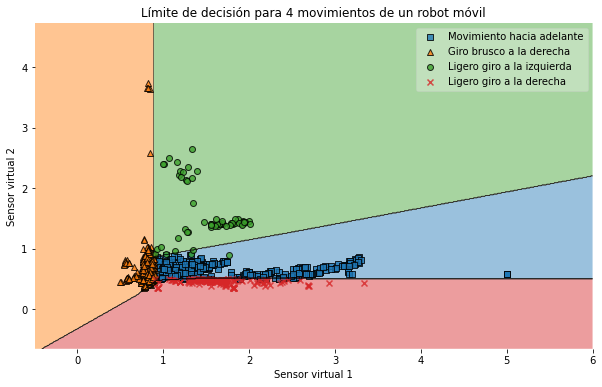

In [22]:
#Importaciones necesarias para gráficar los límites de decisión y generar una red neuronal
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Se define una clase para convertir valores codificados mediante one-hot a valores enteros
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_2.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación tanh y como entradas la cantidad de columnas de X_train
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation='softmax'))

# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(learning_rate=0.1, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_split=0.2)

#Convierte las salidas tipo one-hot a números enteros
model_no_ohe = Onehot2Int(model)

#Para determinar los límites de decisión según el modelos del clasificador
ax=plot_decision_regions(X_test, y_test, clf=model_no_ohe)

# Añadir anotaciones a los ejes
plt.xlabel('Sensor virtual 1')
plt.ylabel('Sensor virtual 2')
plt.title('Límite de decisión para 4 movimientos de un robot móvil')
plt.rcParams["figure.figsize"] = (10,6)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Movimiento hacia adelante','Giro brusco a la derecha','Ligero giro a la izquierda','Ligero giro a la derecha'], 
           framealpha=0.3, scatterpoints=1)


plt.show()

Ahora se mantendrá el número de iteraciones en 1000 y se aumentará el learning rate a 2.

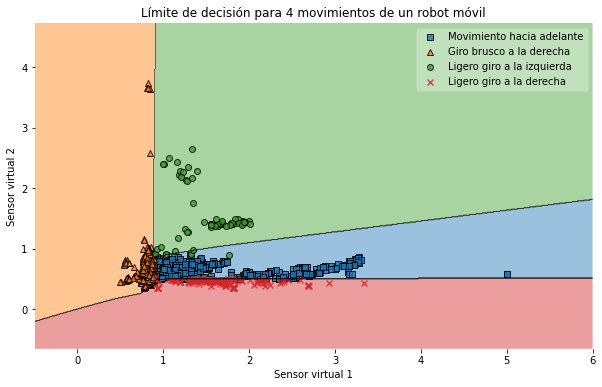

In [23]:
#Importaciones necesarias para gráficar los límites de decisión y generar una red neuronal
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Se define una clase para convertir valores codificados mediante one-hot a valores enteros
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_2.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación tanh y como entradas la cantidad de columnas de X_train
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation='softmax'))

# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(learning_rate=2, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_split=0.2)


#Convierte las salidas tipo one-hot a números enteros
model_no_ohe = Onehot2Int(model)

#Para determinar los límites de decisión según el modelos del clasificador
ax=plot_decision_regions(X_test, y_test, clf=model_no_ohe)

# Añadir anotaciones a los ejes
plt.xlabel('Sensor virtual 1')
plt.ylabel('Sensor virtual 2')
plt.title('Límite de decisión para 4 movimientos de un robot móvil')
plt.rcParams["figure.figsize"] = (10,6)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Movimiento hacia adelante','Giro brusco a la derecha','Ligero giro a la izquierda','Ligero giro a la derecha'], 
           framealpha=0.3, scatterpoints=1)


plt.show()

In [ ]:
Manteniendo el learning rate en 2 y disminuyendo el número de iteraciones a 100:

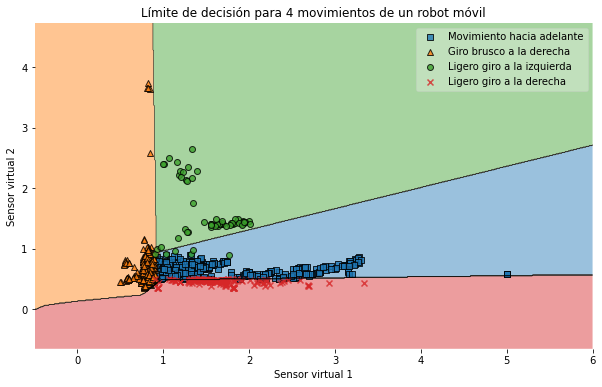

In [24]:
#Importaciones necesarias para gráficar los límites de decisión y generar una red neuronal
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Se define una clase para convertir valores codificados mediante one-hot a valores enteros
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_2.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación tanh y como entradas la cantidad de columnas de X_train
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation='softmax'))

# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(learning_rate=2, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

#Convierte las salidas tipo one-hot a números enteros
model_no_ohe = Onehot2Int(model)

#Para determinar los límites de decisión según el modelos del clasificador
ax=plot_decision_regions(X_test, y_test, clf=model_no_ohe)

# Añadir anotaciones a los ejes
plt.xlabel('Sensor virtual 1')
plt.ylabel('Sensor virtual 2')
plt.title('Límite de decisión para 4 movimientos de un robot móvil')
plt.rcParams["figure.figsize"] = (10,6)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Movimiento hacia adelante','Giro brusco a la derecha','Ligero giro a la izquierda','Ligero giro a la derecha'], 
           framealpha=0.3, scatterpoints=1)


plt.show()

Ahora se mantendrá el número de iteraciones en 100 y el learning rate en 2, pero se aumentará la capa oculta a 50 neuronas:

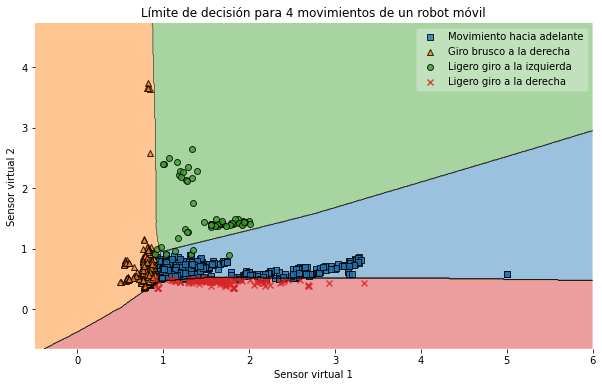

In [25]:
#Importaciones necesarias para gráficar los límites de decisión y generar una red neuronal
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Se define una clase para convertir valores codificados mediante one-hot a valores enteros
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_2.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación tanh y como entradas la cantidad de columnas de X_train
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation='softmax'))

# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(learning_rate=2, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, validation_split=0.2)

#Convierte las salidas tipo one-hot a números enteros
model_no_ohe = Onehot2Int(model)

#Para determinar los límites de decisión según el modelos del clasificador
ax=plot_decision_regions(X_test, y_test, clf=model_no_ohe)

# Añadir anotaciones a los ejes
plt.xlabel('Sensor virtual 1')
plt.ylabel('Sensor virtual 2')
plt.title('Límite de decisión para 4 movimientos de un robot móvil')
plt.rcParams["figure.figsize"] = (10,6)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Movimiento hacia adelante','Giro brusco a la derecha','Ligero giro a la izquierda','Ligero giro a la derecha'], 
           framealpha=0.3, scatterpoints=1)


plt.show()

Ahora se aumentará el número de iteraciones a 1000, 50 neuronas en la capa oculta y un learning rate de 2:

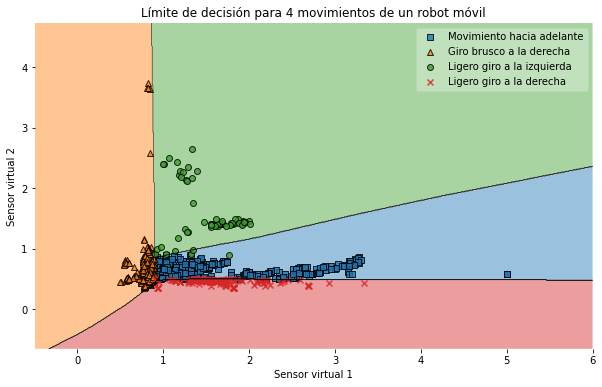

In [28]:
#Importaciones necesarias para gráficar los límites de decisión y generar una red neuronal
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Se define una clase para convertir valores codificados one-hot a valores enteros
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_2.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación tanh y como entradas la cantidad de columnas de X_train
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation='softmax'))

# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(learning_rate=2, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_split=0.2)

#Convierte las salidas tipo one-hot a números enteros
model_no_ohe = Onehot2Int(model)

#Para determinar los límites de decisión según el modelos del clasificador
ax=plot_decision_regions(X_test, y_test, clf=model_no_ohe)

# Añadir anotaciones a los ejes
plt.xlabel('Sensor virtual 1')
plt.ylabel('Sensor virtual 2')
plt.title('Límite de decisión para 4 movimientos de un robot móvil')
plt.rcParams["figure.figsize"] = (10,6)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Movimiento hacia adelante','Giro brusco a la derecha','Ligero giro a la izquierda','Ligero giro a la derecha'], 
           framealpha=0.3, scatterpoints=1)


plt.show()

Por último, se va a mantener un número de iteraciones de 1000, 50 neuronas en capa oculta y 0.1 para el learning rate:

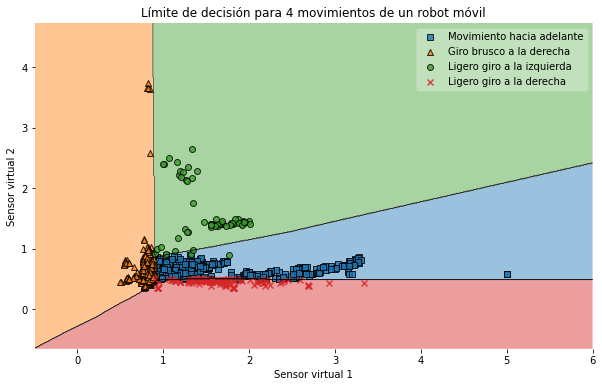

In [29]:
#Importaciones necesarias para gráficar los límites de decisión y generar una red neuronal
import tensorflow as tf
from pandas import read_csv
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.data import iris_data
from mlxtend.preprocessing import standardize
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Se define una clase para convertir valores codificados one-hot a valores enteros
class Onehot2Int(object):

    def __init__(self, model):
        self.model = model

    def predict(self, X):
        y_pred = self.model.predict(X)
        return np.argmax(y_pred, axis=1)

#Link de los datos crudos
path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_2.csv"

#Se crea un array para almacenar los datos
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]
X = X.astype('float32')
y = LabelEncoder().fit_transform(y)

# Dividir datos en datos de entrenamiento y prueba a una razón de 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo de forma secuencial
model = Sequential()

#Se define la primer capa oculta y la capa de entrada, función de activación relu y como entradas la cantidad de columnas de X_train
model.add(Dense(50, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))

#Se define la capa de salida con la función de densidad de probabilidad
model.add(Dense(4, activation='softmax'))

# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(learning_rate=0.1, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0, validation_split=0.2)

#Convierte las salidas tipo one-hot a números enteros
model_no_ohe = Onehot2Int(model)

#Para determinar los límites de decisión según el modelos del clasificador
ax=plot_decision_regions(X_test, y_test, clf=model_no_ohe)

# Añadir anotaciones a los ejes
plt.xlabel('Sensor virtual 1')
plt.ylabel('Sensor virtual 2')
plt.title('Límite de decisión para 4 movimientos de un robot móvil')
plt.rcParams["figure.figsize"] = (10,6)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, 
          ['Movimiento hacia adelante','Giro brusco a la derecha','Ligero giro a la izquierda','Ligero giro a la derecha'], 
           framealpha=0.3, scatterpoints=1)


plt.show()

En conclusión, se pudo notar que la mejor combinación de parámetros fue la tercera: learning rate=2, número de neuronas de capa oculta igual a 10 y 1000 iteraciones. Se puede notar de la tercera figura que los límites de decisión son bastante exactos a excepción de algunos puntos específicos del conjunto. En especial la categoría de "ligero giro a la derecha" está muy traslapada con "movimiento hacia adelante" por lo que hace que el límite de decisión se menos preiso. De forma general, el modelo logró clasificar bastante bien los datos a pesar de que no todas las categorías son linealmente separables entre sí.

## 7. Inserción de ruido 

Para esta sección se insertó un ruido con valor aleatorio entre 3% y 6% del promedio de cada variabla con la función GaussianNoise, luego se probó la red neuronal comparándola con el mejor método escogido en la sección 4. Para realizar esto se volvió a realizar la red con tal de no ser afectada por los resultados anteriores. 

In [20]:
import tensorflow as tf
import random
from numpy import argmax
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GaussianNoise

# para definir el valor random entre 3 y 6% del promedio
ruido = random.uniform(0.03, 0.06)

path = "https://raw.githubusercontent.com/Vektor1428/Inteligencia_Artificial/main/sensor_readings_4.csv"
df = read_csv(path, header=None)

# Definición de entradas y salidas
X, y = df.values[:, :-1], df.values[:, -1]

# asegurarse que los datos sean flotantes
X = X.astype('float32')

# convertir los strings a enteros 
y = LabelEncoder().fit_transform(y)


# Dividir datos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

# Encontrar el numero de datos de entrada
n_features = X_train.shape[1]

# Definir  el modelo 
model = Sequential()

model.add(GaussianNoise(ruido, input_shape=(n_features,))) # inserción de ruido en como una capa de entrada
model.add(Dense(10, activation='tanh', kernel_initializer='he_normal')) #capa oculta
model.add(Dense(4, activation='softmax')) # capa final 

Luego de insertar el ruido como una capa de entrada, la cual no hace más que dar como salida los mismos datos de entrada pero modificados levemente por el ruido, se procedió a entrenar y testear la red con la mejor combinación obtenida en el punto 4. Esta combinación consiste en una taza de aprendizaje de 0.1, 10 neuronas, 1000 iteraciones y una función de optimización de gradiente descendiente con momentum de 1. 

In [21]:
# función de optimización SDG y sus parámetros (con momentum) con gradiente desendiente
tf.keras.optimizers.SGD(
    learning_rate=0.1, momentum=1.0, nesterov=False, name='SGD' )

# compilar el modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# entrenar el modelo
model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0)
# evaluar el modelo
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Test Accuracy: %.3f' % acc)
print ('Test loss: %.3f' %loss)

Test Accuracy: 0.953
Test loss: 0.154


Como se observó en el punto 4, esta combinación, dió como resultado una precisión de 99,2% mientras que si se entrena la red con ruido aleatorio entre 3% y 6% del promedio de los datos, esta tiene una precisión de 95,3% lo cual es una diferencia importante, de un 3,9%. Lo cual indica que claramente los datos con ruido son un problema a la hora de entrenar y testear la red neuronal. 